Insight:
Standard libraries used for data processing and visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)


In [4]:
df = pd.read_csv("swiggy.csv")


Insight:
Improves consistency and avoids case-sensitive errors.

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


Insight:
Keeps analysis focused on key business metrics.

In [7]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)



In [8]:
df.columns


Index(['id', 'area', 'city', 'restaurant', 'price', 'avg_ratings',
       'total_ratings', 'food_type', 'address', 'delivery_time'],
      dtype='object')

Insight:
Missing ratings handled without affecting overall trends.

In [10]:

df.isnull().sum()


id               0
area             0
city             0
restaurant       0
price            0
avg_ratings      0
total_ratings    0
food_type        0
address          0
delivery_time    0
dtype: int64

In [17]:
df['avg_ratings'] = df['avg_ratings'].fillna(df['avg_ratings'].mean())

df.dropna(inplace=True)


In [18]:
df.drop_duplicates(inplace=True)


Restaurants by Area

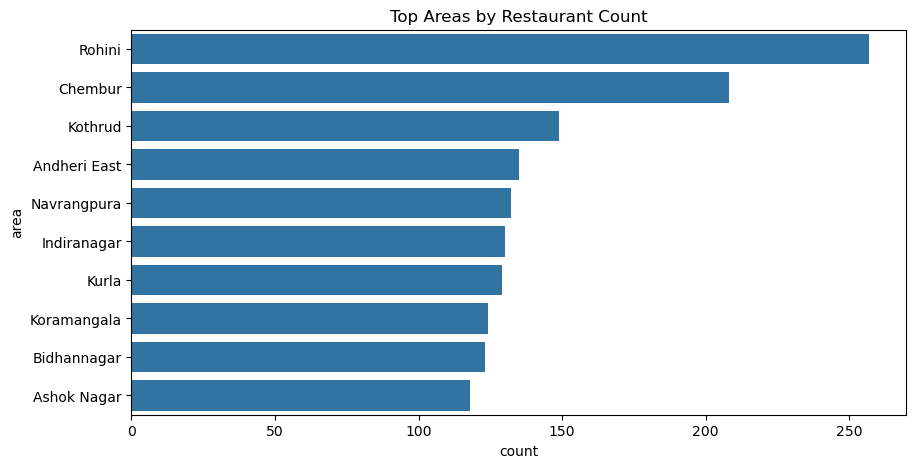

In [19]:
sns.countplot(data=df, y='area', order=df['area'].value_counts().head(10).index)
plt.title("Top Areas by Restaurant Count")
plt.show()


In [ ]:
Insight:
Certain areas have high restaurant density.

Most Popular Food Types

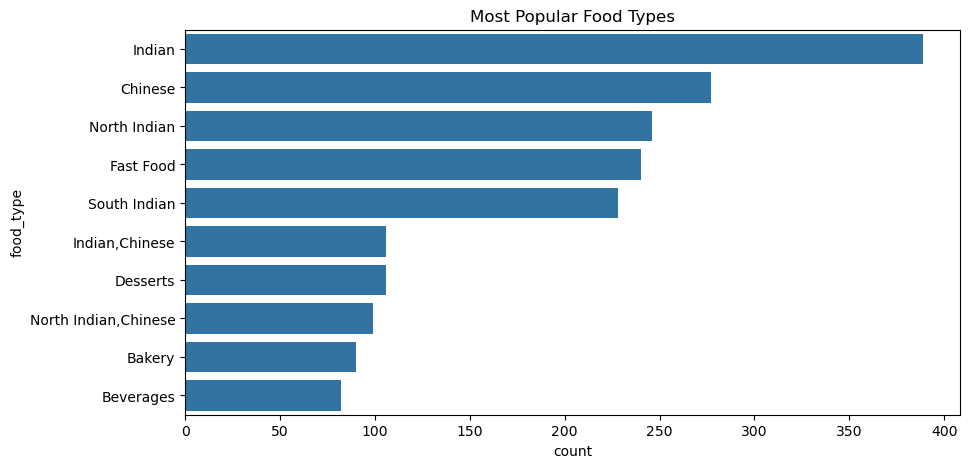

In [20]:
sns.countplot(
    data=df,
    y='food_type',
    order=df['food_type'].value_counts().head(10).index
)
plt.title("Most Popular Food Types")
plt.show()


In [ ]:
Insight:
A few cuisines dominate restaurant listings.

Price Distribution

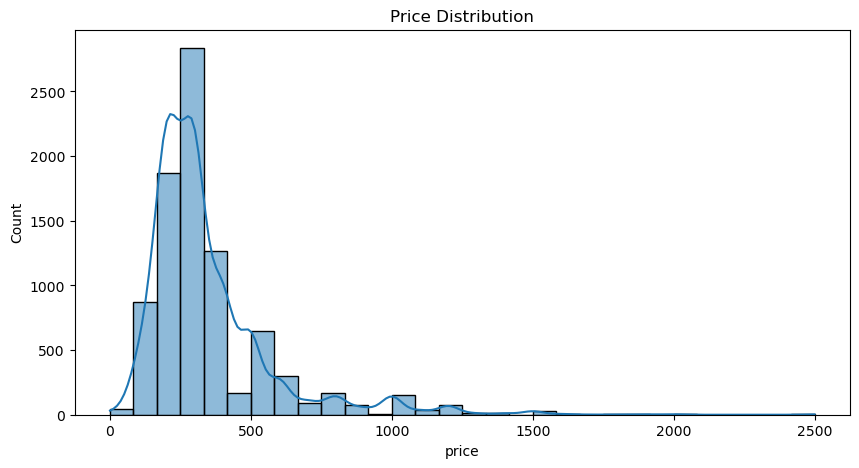

In [21]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()


Insight:
Most restaurants fall in the mid-price range.

Rating Distribution

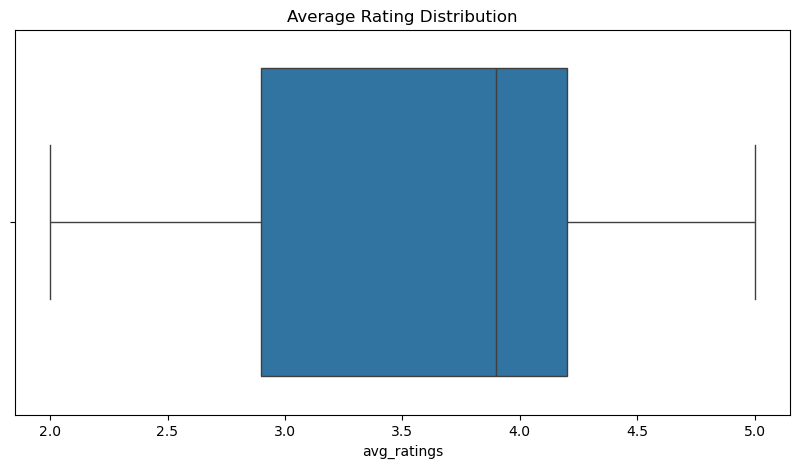

In [23]:
sns.boxplot(x=df['avg_ratings'])
plt.title("Average Rating Distribution")
plt.show()


In [ ]:
Insight:
Majority of restaurants are rated above average.

Delivery Time Distribution

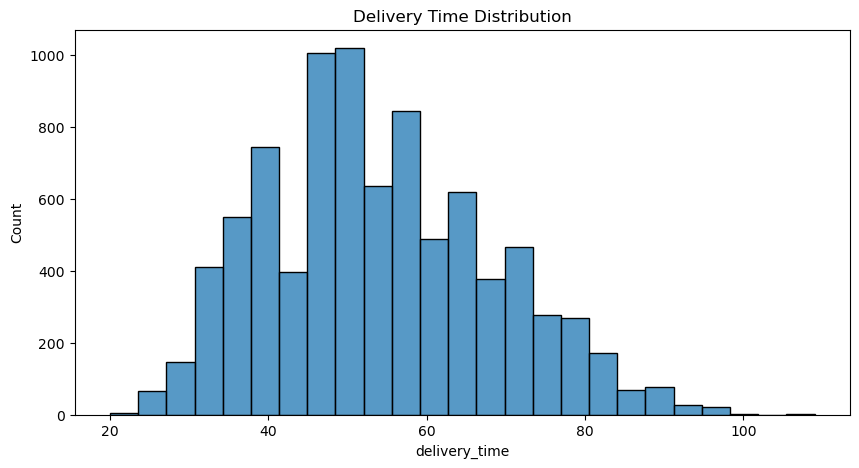

In [24]:
sns.histplot(df['delivery_time'], bins=25)
plt.title("Delivery Time Distribution")
plt.show()


Insight:
Delivery times are largely consistent across restaurants.

Price vs Rating

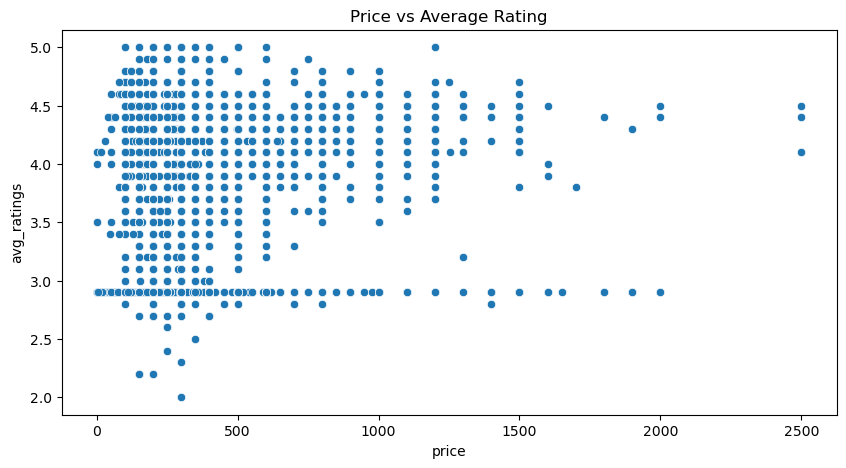

In [26]:
sns.scatterplot(data=df, x='price', y='avg_ratings')
plt.title("Price vs Average Rating")
plt.show()


Insight:
Higher price does not guarantee higher ratings.

Top Rated Restaurants (Min Reviews)

In [28]:
top_rated = df[df['total_ratings'] > 100].sort_values(
    by='avg_ratings', ascending=False
).head(10)

top_rated[['restaurant', 'avg_ratings', 'total_ratings']]


,restaurant,avg_ratings,total_ratings
8251,Nic Natural Ice Creams,4.8,500
208,Fresh Baked Goodness,4.7,500
2264,Momo Sa-Khang By Kailash Kitchen,4.7,500
6910,Mithai,4.7,1000
8002,Nic Natural Ice Creams,4.7,500
315,Amadora Gourmet Ice Creams,4.7,500
7363,New Kalpana Mistanna Bhander,4.7,1000
2312,Milano Ice Cream,4.7,500
1217,The Grand Sweets And Snacks - Amirtham Restaurant,4.7,500
1749,The Brownie Studio,4.7,500


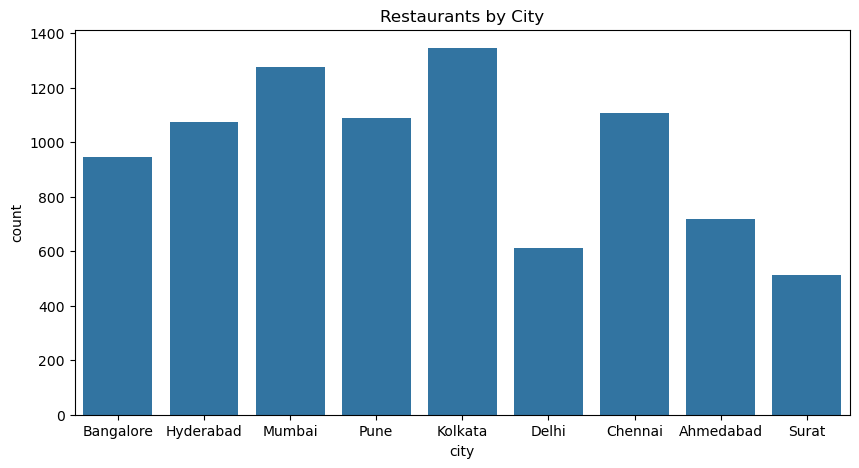

In [29]:
sns.countplot(data=df, x='city')
plt.title("Restaurants by City")
plt.show()


Insight:
Bangalore has the highest restaurant concentration.

Top 10 Areas by Restaurant Count

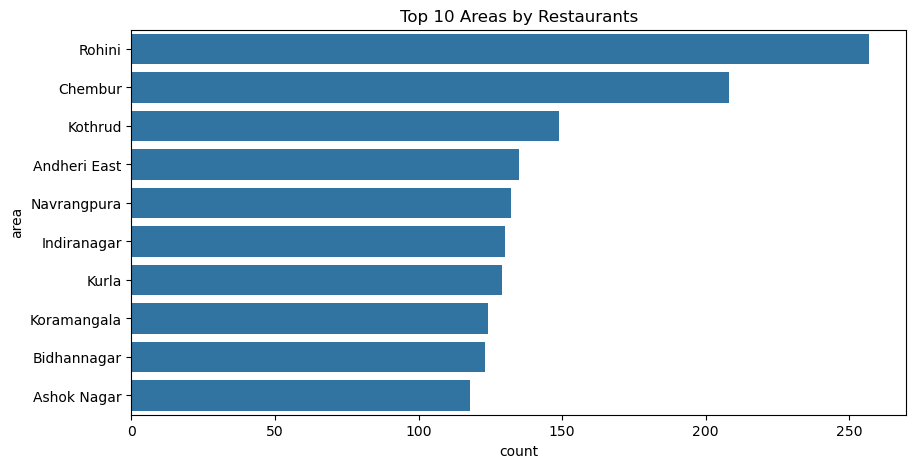

In [30]:
sns.countplot(
    data=df,
    y='area',
    order=df['area'].value_counts().head(10).index
)
plt.title("Top 10 Areas by Restaurants")
plt.show()


In [ ]:
Insight:
Few areas dominate restaurant density.

Most Popular Food Types

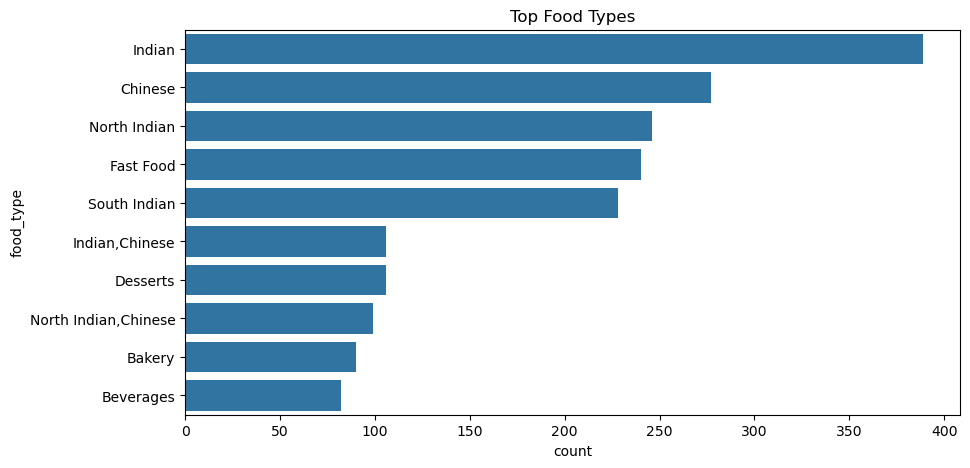

In [31]:
sns.countplot(
    data=df,
    y='food_type',
    order=df['food_type'].value_counts().head(10).index
)
plt.title("Top Food Types")
plt.show()


Insight:
Indian and Chinese cuisines are most common.

Price Distribution

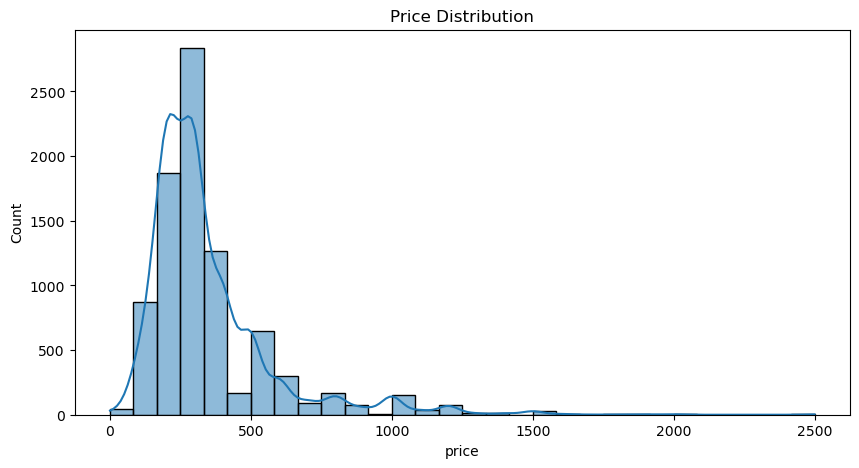

In [32]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()


Insight:
Most restaurants operate in mid-price range.

Average Rating Distribution

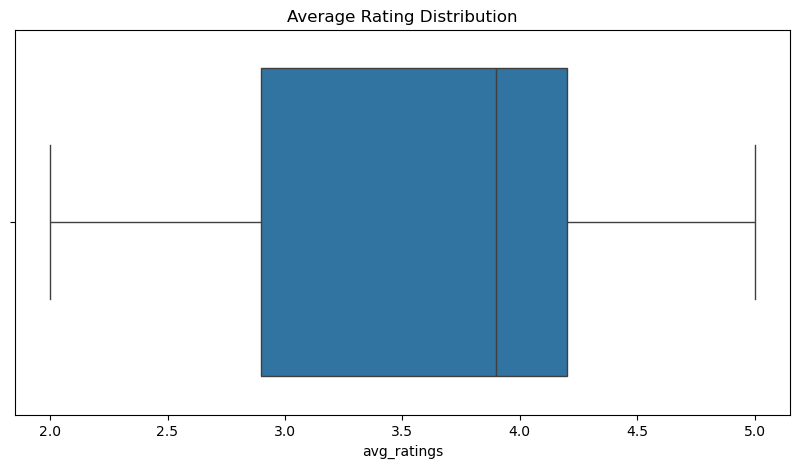

In [33]:
sns.boxplot(x=df['avg_ratings'])
plt.title("Average Rating Distribution")
plt.show()


Total Rating Count Distribution

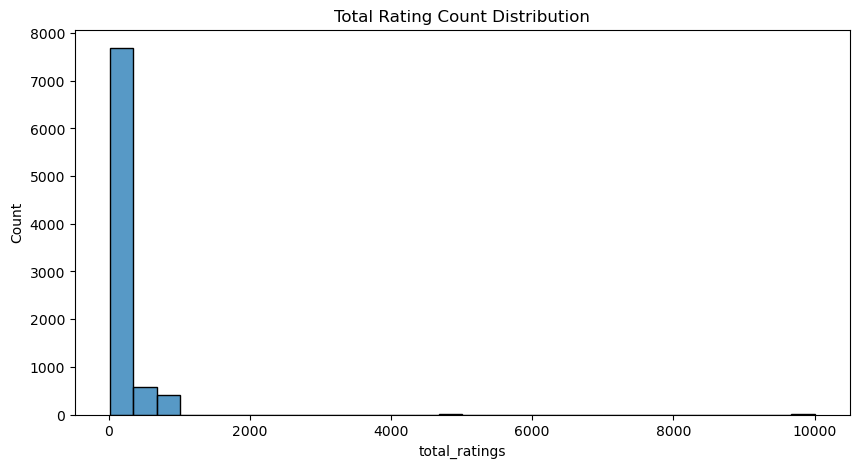

In [34]:
sns.histplot(df['total_ratings'], bins=30)
plt.title("Total Rating Count Distribution")
plt.show()


Insight:
Most restaurants have moderate review volume.

Delivery Time Distribution

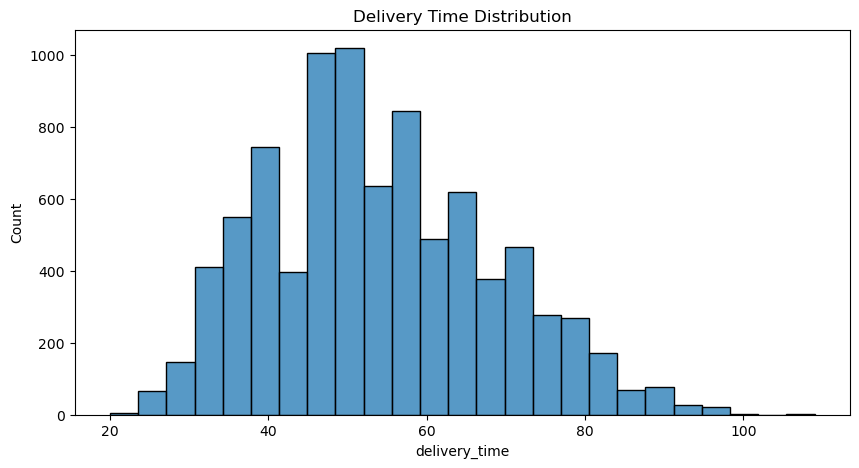

In [35]:
sns.histplot(df['delivery_time'], bins=25)
plt.title("Delivery Time Distribution")
plt.show()


Insight:
Delivery time is generally between 45–60 minutes.

Average Delivery Time by Area (Top 10)

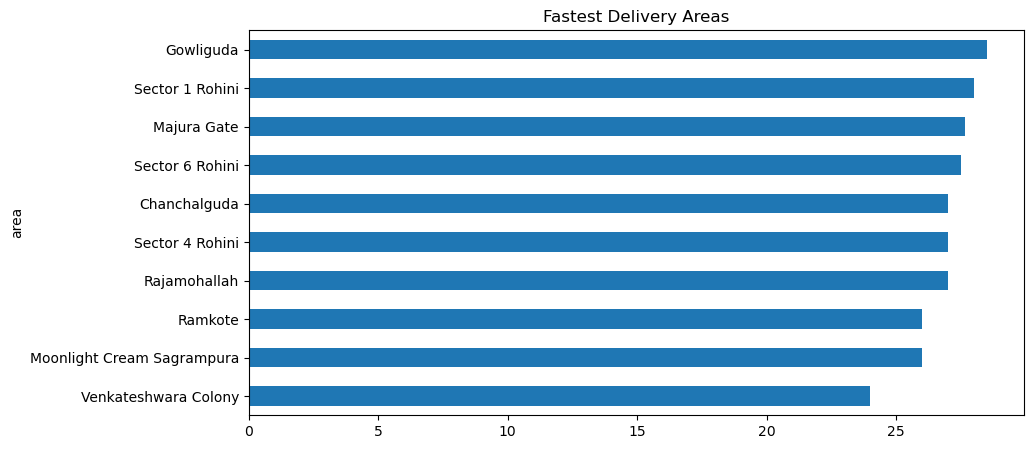

In [36]:
avg_delivery_area = (
    df.groupby('area')['delivery_time']
    .mean()
    .sort_values()
    .head(10)
)

avg_delivery_area.plot(kind='barh')
plt.title("Fastest Delivery Areas")
plt.show()


Insight:
Certain areas consistently deliver faster.

Average Price by Area (Top 10)

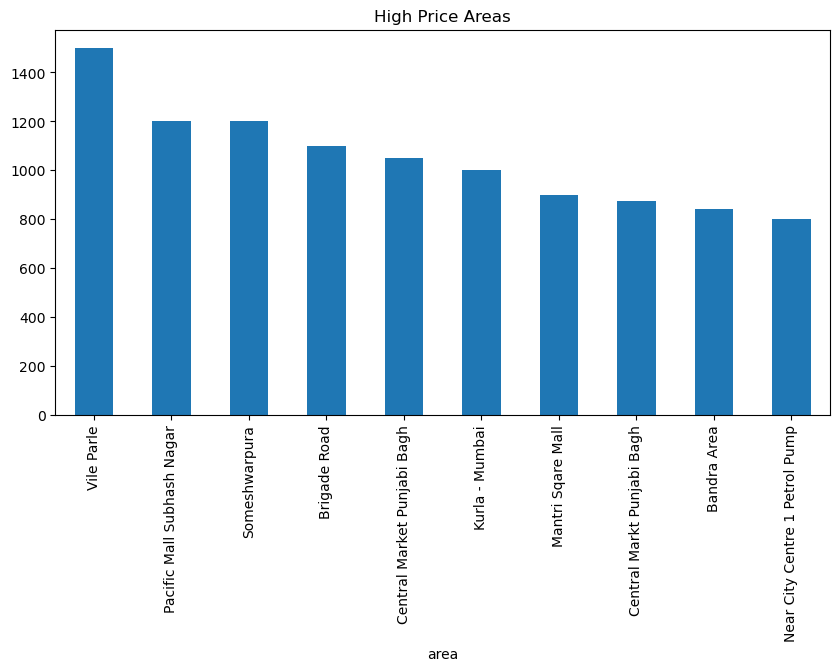

In [37]:
avg_price_area = (
    df.groupby('area')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

avg_price_area.plot(kind='bar')
plt.title("High Price Areas")
plt.show()


Insight:
Premium pricing clusters in select areas.

Price vs Average Rating

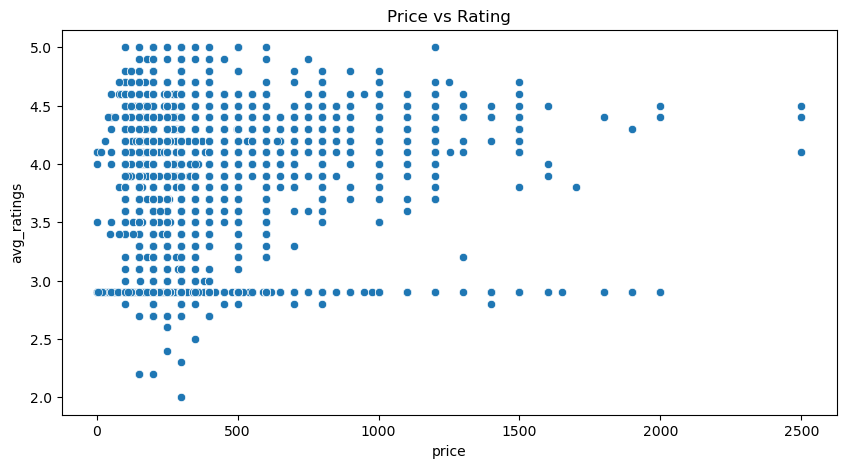

In [38]:
sns.scatterplot(data=df, x='price', y='avg_ratings')
plt.title("Price vs Rating")
plt.show()


Insight:
Higher price does not ensure better ratings.

Delivery Time vs Rating

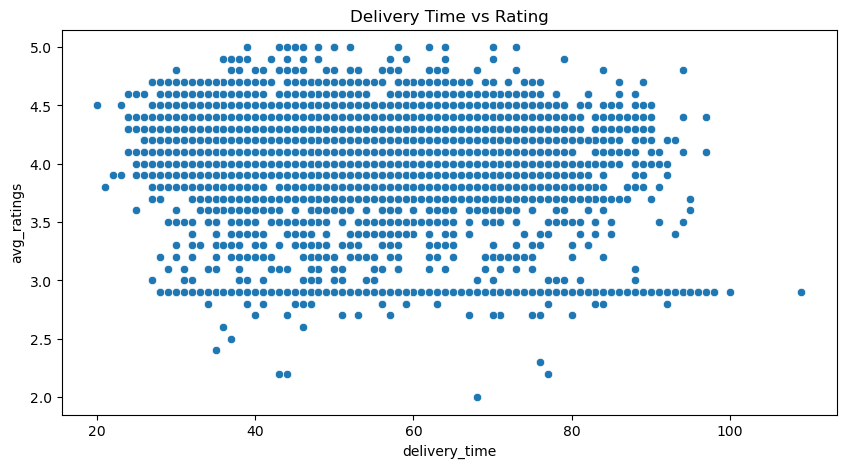

In [39]:
sns.scatterplot(data=df, x='delivery_time', y='avg_ratings')
plt.title("Delivery Time vs Rating")
plt.show()


Insight:
Longer delivery slightly impacts ratings.

Top Rated Restaurants (Min 100 Reviews)

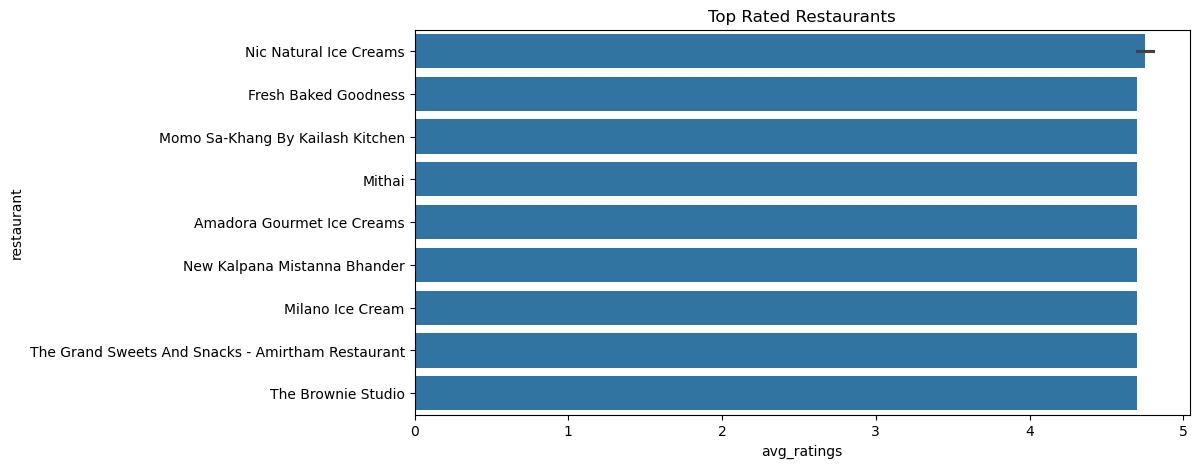

In [41]:
top_rated = df[df['total_ratings'] > 100] \
    .sort_values('avg_ratings', ascending=False) \
    .head(10)

sns.barplot(
    x='avg_ratings',
    y='restaurant',
    data=top_rated
)
plt.title("Top Rated Restaurants")
plt.show()


Insight:
Consistently high-rated restaurants build trust.

Food Type vs Average Rating

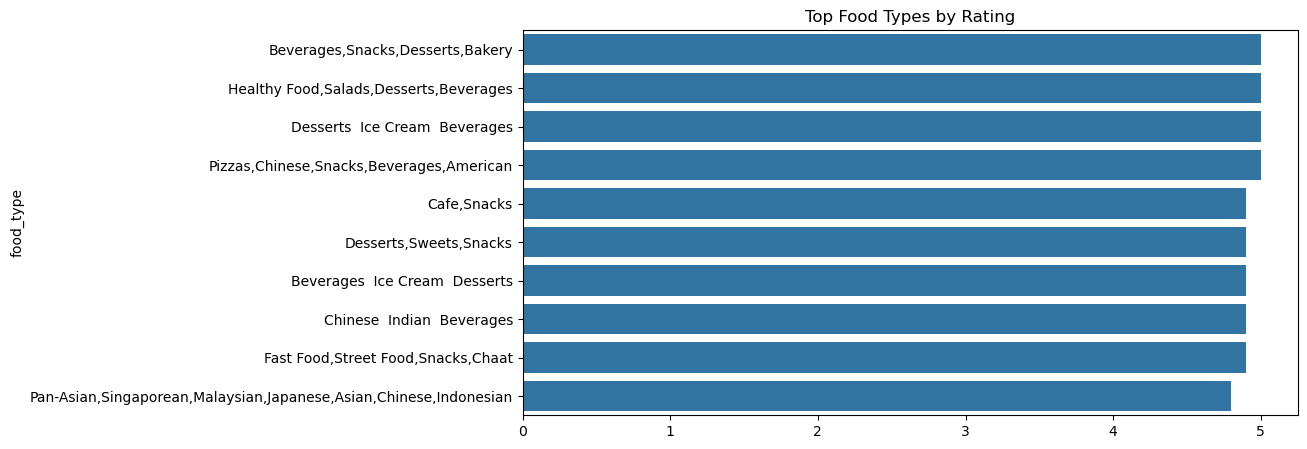

In [42]:
food_rating = (
    df.groupby('food_type')['avg_ratings']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(x=food_rating.values, y=food_rating.index)
plt.title("Top Food Types by Rating")
plt.show()


Insight:
Certain cuisines perform better in customer satisfaction.

Food Type vs Average Price

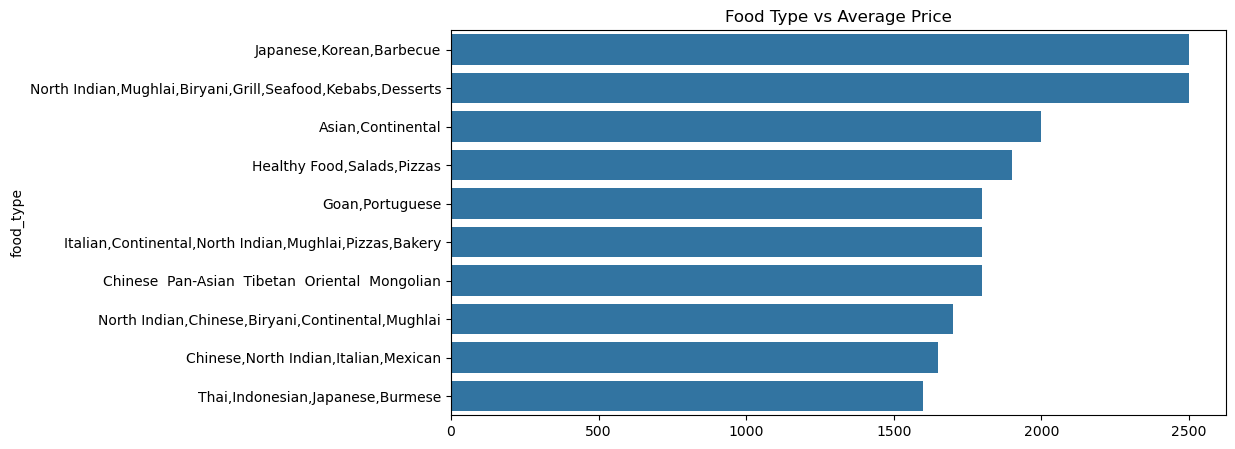

In [43]:
food_price = (
    df.groupby('food_type')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(x=food_price.values, y=food_price.index)
plt.title("Food Type vs Average Price")
plt.show()


Insight:
Cuisine type strongly influences pricing.

Correlation Heatmap

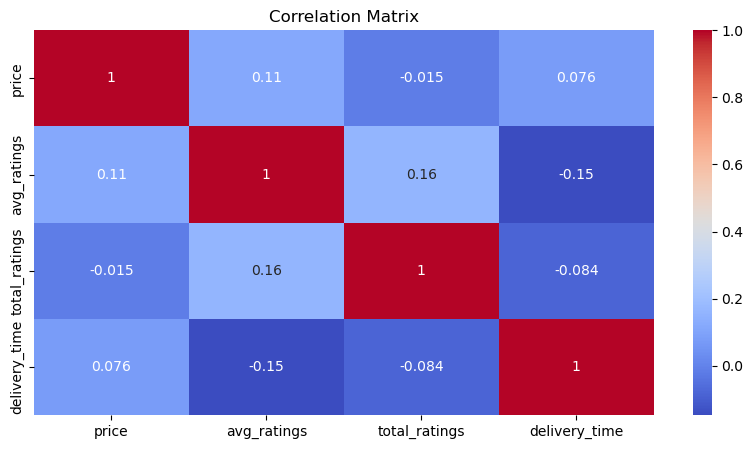

In [45]:
sns.heatmap(
    df[['price','avg_ratings','total_ratings','delivery_time']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix")
plt.show()


Insight:
Ratings and price show weak correlation.